In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from PIL import Image


In [ ]:
# Load images from a dataset (with normalization and augmentation)
train_dir = '/content/drive/MyDrive/training '
validation_dir = '/content/drive/MyDrive/validation'

In [ ]:
# Image data generator for preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    shear_range=0.2,  # Shear transformation for augmentation
    zoom_range=0.2,  # Random zoom for augmentation
    horizontal_flip=True  # Horizontal flip for augmentation
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load and preprocess training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

Found 20 images belonging to 2 classes.


In [ ]:
# Load and preprocess validation images
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 12 images belonging to 2 classes.


In [ ]:
# Build a simple CNN model
model = Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(512, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,690 (72.61 MB)

 Trainable params: 19,034,690 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can increase the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.7000 - loss: 0.6884 - val_accuracy: 0.5000 - val_loss: 0.8476
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.8658 - val_accuracy: 0.5000 - val_loss: 2.9251
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 2.6011 - val_accuracy: 0.5000 - val_loss: 0.9482
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5500 - loss: 0.7967 - val_accuracy: 0.5000 - val_loss: 0.8707
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.7904 - val_accuracy: 0.5000 - val_loss: 0.8470
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8274 - val_accuracy: 0.4167 - val_loss: 0.7346
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6787 - val_accuracy: 0.5000 - val_loss: 0.7063
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8500 - loss: 0.6433 - val_accuracy: 0.5833 - val_loss: 0.7173
Epoch 9/10
1/1 ━━━━━━━━━━

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.5833 - loss: 0.7706
Validation Accuracy: 58.33%


In [ ]:
# Save the trained model
model.save('image_classification_model.h5')

In [ ]:
# Predict the classes for the validation dataset
y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


In [ ]:
# Get the true labels from the validation generator
y_true = validation_generator.classes

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

In [ ]:
print(conf_matrix)

[[2 4]
 [3 3]]


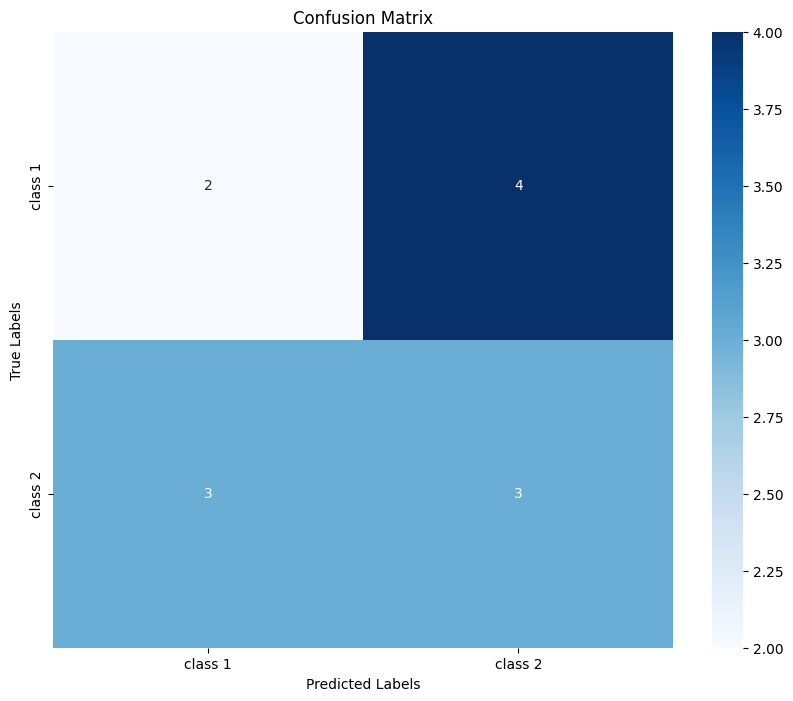

In [ ]:
#  Visualize the confusion matrix
plt.figure(figsize=(10, 8))
class_names = list(validation_generator.class_indices.keys()) # Get all class names as a list
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,  # Use the list of class names directly
            yticklabels=class_names)  # Use the list of class names directly
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Print the classification report for precision, recall, F1-score
print("Classification Report:")
target_names = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

     class 1       0.40      0.33      0.36         6
     class 2       0.43      0.50      0.46         6

    accuracy                           0.42        12
   macro avg       0.41      0.42      0.41        12
weighted avg       0.41      0.42      0.41        12



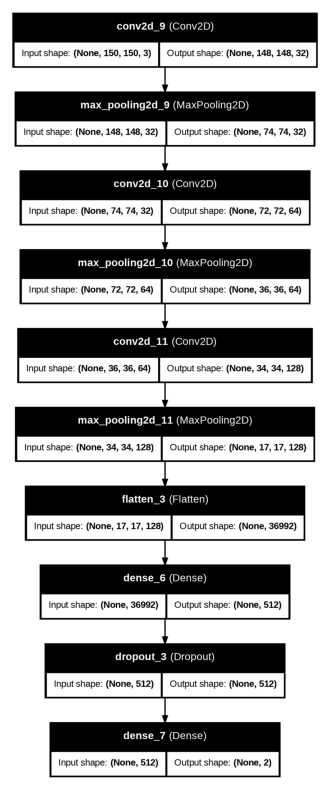

In [ ]:
# Visualize and save the model architecture
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# Load the saved image and display it using PIL and matplotlib
img = Image.open('model_visualization.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.show()